In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

athletes = pd.read_csv('../data/summerOly_athletes.csv', index_col=False)
hosts = pd.read_csv('../data/summerOly_hosts.csv', index_col=False)
medal_counts = pd.read_csv('../data/summerOly_medal_counts.csv', index_col=False)
programs = pd.read_csv('../data/summerOly_programs-cleaned.csv', index_col=False)

In [2]:
df = pd.read_csv('../data/updated_medal_counts.csv', index_col=False)

In [3]:
df[(df['Year']==2020) & (df['Host']==1)]

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Host
1253,3,Japan,27,14,17,58,2020,1


In [4]:
df[(df['Year']==2012)]

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Host
1079,1,United States,48,26,30,104,2012,0
1080,2,China,39,31,22,92,2012,0
1081,3,Great Britain,29,18,18,65,2012,1
1082,4,Russia,18,21,26,65,2012,0
1083,5,South Korea,13,9,9,31,2012,0
...,...,...,...,...,...,...,...,...
1160,79,Kuwait,0,0,1,1,2012,0
1161,79,Morocco,0,0,1,1,2012,0
1162,79,Saudi Arabia,0,0,1,1,2012,0
1163,79,Tajikistan,0,0,1,1,2012,0


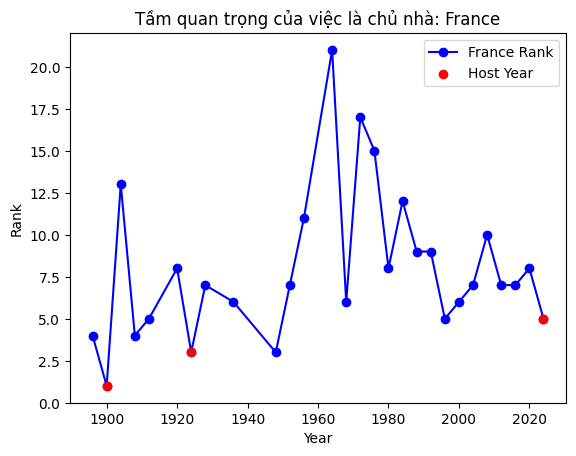

In [6]:
import matplotlib.pyplot as plt

# Lấy dữ liệu của France
france_data = df[df['NOC'] == 'France']

# Xác định các năm là chủ nhà
host_years = france_data[france_data['Host'] == True]['Year']
host_ranks = france_data[france_data['Host'] == True]['Rank']

# Vẽ biểu đồ chính
plt.plot(france_data['Year'], france_data['Rank'], label='France Rank', color='b', marker='o')

# Đánh dấu năm chủ nhà bằng dấu chấm đỏ
plt.scatter(host_years, host_ranks, color='red', label='Host Year', zorder=5)

# Thêm nhãn và chú thích
plt.title('Tầm quan trọng của việc là chủ nhà: France')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.legend()
#plt.gca().invert_yaxis()  # Đảo ngược trục Y nếu cần (thứ hạng thấp hơn là tốt hơn)

plt.show()


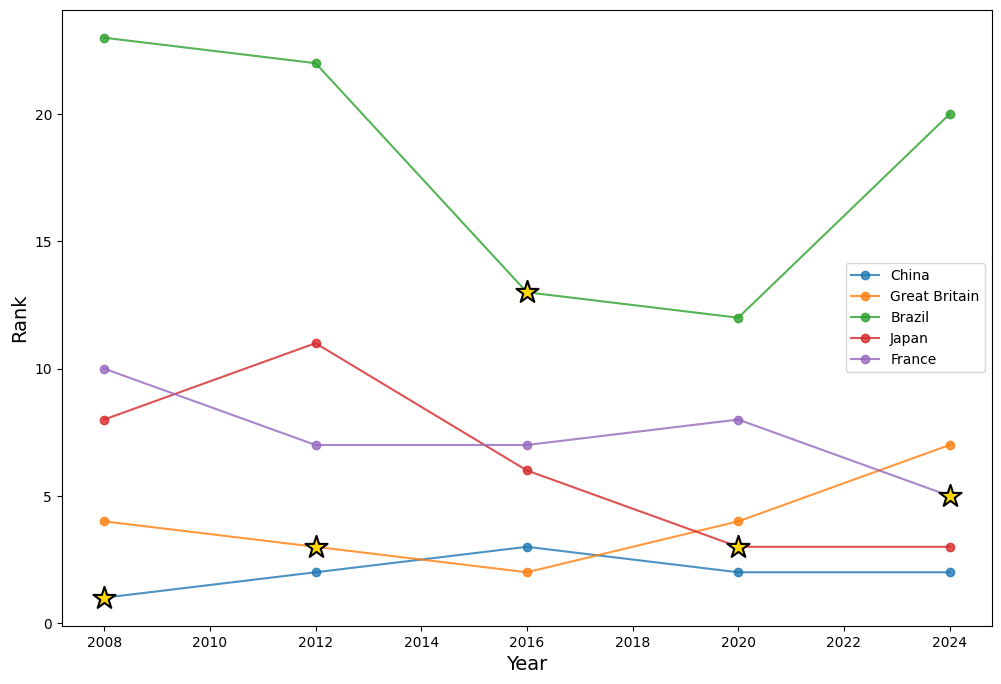

In [11]:
import matplotlib.pyplot as plt

# Lọc dữ liệu từ năm 2000 trở đi
df_2000 = df[df['Year'] >= 2008]

# Lọc các nước làm chủ nhà từ năm 2000
host_countries = df_2000[df_2000['Host'] == True]['NOC'].unique()

# Vẽ biểu đồ cho từng nước làm chủ nhà
plt.figure(figsize=(12, 8))
for country in host_countries:
    # Lọc dữ liệu của từng nước
    country_data = df_2000[df_2000['NOC'] == country]
    
    # Xác định các năm làm chủ nhà
    host_years = country_data[country_data['Host'] == True]['Year']
    host_ranks = country_data[country_data['Host'] == True]['Rank']
    
    # Vẽ đường biểu diễn
    plt.plot(country_data['Year'], country_data['Rank'], label=country, marker='o', alpha=0.8)
    
    # Đánh dấu năm chủ nhà bằng chấm đỏ lớn hơn và thêm viền
    plt.scatter(
        host_years, 
        host_ranks, 
        #color='red', 
        #edgecolor='black',  # Viền màu đen
        linewidth=1.5,      # Độ dày viền
        s=280,              # Tăng kích thước điểm
        edgecolor='black',
        marker='*',
        zorder=10,
        color='gold'
    )

# Thêm nhãn và chú thích
#plt.title('Host Country Rank (2008 - 2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.legend()
plt.grid(False)
plt.show()
#plt.savefig('./figures/host_country_rank.png')

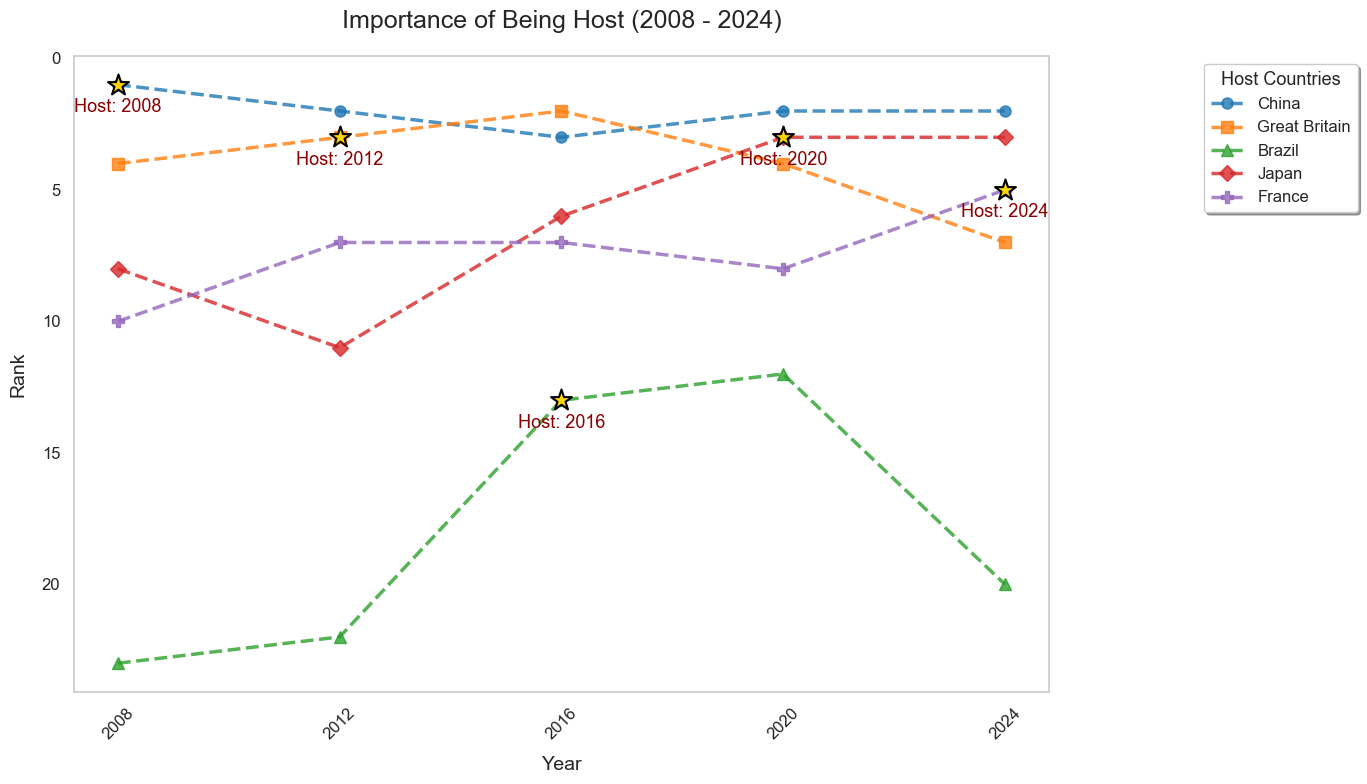

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

# Cài đặt style và màu sắc
sns.set_theme(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
                                        marker=['o', 's', '^', 'D', 'P'])

# Lọc dữ liệu
df_2000 = df[df['Year'] >= 2008]
host_countries = df_2000[df_2000['Host'] == True]['NOC'].unique()

# Tạo figure
plt.figure(figsize=(14, 8))

# Vẽ từng quốc gia
for country in host_countries:
    country_data = df_2000[df_2000['NOC'] == country]
    host_years = country_data[country_data['Host'] == True]['Year']
    host_ranks = country_data[country_data['Host'] == True]['Rank']
    
    # Đường biểu diễn
    plt.plot(
        country_data['Year'], 
        country_data['Rank'], 
        label=country, 
        markersize=8,
        linewidth=2.5,
        linestyle='--',
        alpha=0.8
    )
    
    # Đánh dấu năm chủ nhà
    plt.scatter(
        host_years, 
        host_ranks, 
        s=250,
        edgecolor='black',
        linewidth=1.5,
        marker='*',
        zorder=10,
        color='gold'
    )
    
    # Thêm chú thích năm
    for year, rank in zip(host_years, host_ranks):
        plt.text(
            year, 
            rank + 1.2, 
            f'Host: {int(year)}',
            fontsize=13,
            ha='center',
            va='bottom',
            color='darkred'
        )

# Tùy chỉnh trục và nhãn
plt.title('Importance of Being Host (2008 - 2024)', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Rank', fontsize=14, labelpad=10)
plt.xticks(df_2000['Year'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Rank 1 ở trên cùng

# Grid lines và chú thích
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(
    bbox_to_anchor=(1.15, 1), 
    loc='upper left', 
    fontsize=12,
    title='Host Countries',
    title_fontsize=13,
    frameon=True,
    shadow=True
)

# Điều chỉnh layout
plt.tight_layout()
plt.grid(False)
# Lưu hoặc hiển thị
#plt.savefig('host_country_rank.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
df[(df['Year']==2024) & (df['Host']==1)]

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Host
1348,5,France,16,26,22,64,2024,1


## Xem các events được host thêm vào

In [78]:
athletes = pd.read_csv('../data/summerOly_athletes.csv', index_col=False)
hosts = pd.read_csv('../data/summerOly_hosts.csv', index_col=False)
medal_counts = pd.read_csv('../data/summerOly_medal_counts.csv', index_col=False)
programs = pd.read_csv('../data/summerOly_programs-cleaned.csv', index_col=False)

In [ ]:
programs[(programs['2012']==0) & (programs['2016']==0) & (programs['2020']!=0)]

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906,1908,1912,...,1992,1996,2000,2004,2008,2012,2016,2020,2024,discipline_sum_events
8,Baseball and Softball,Baseball,BSB,WBSC,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,6.0
9,Baseball and Softball,Softball,SBL,WBSC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0
10,Basketball,3x3,BK3,FIBA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0
16,Cycling,BMX Freestyle,BMF,UCI,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0
33,Karate,Karate,KTE,WKF,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0
39,Skateboarding,Skateboarding,SKB,World Skate,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,6.0
40,Sport Climbing,Sport Climbing,CLB,IFSC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0
41,Surfing,Surfing,SRF,ISA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,42.0


In [14]:
athletes[(athletes['Sport']=='Karate') & (athletes['Year']==2020)]

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
222569,Hamideh Abbasali,F,Iran,IRI,2020,Tokyo,Karate,Women's Kumite +61kg,No medal
222581,Abdalla Abdelaziz,M,Egypt,EGY,2020,Tokyo,Karate,Men's Kumite -75kg,No medal
222583,Feryal Abdelaziz,F,Egypt,EGY,2020,Tokyo,Karate,Women's Kumite +61kg,Gold
222727,Rafael Aghayev,M,Azerbaijan,AZE,2020,Tokyo,Karate,Men's Kumite -75kg,Silver
222798,Ugur Aktas,M,Turkey,TUR,2020,Tokyo,Karate,Men's Kumite +75kg,Bronze
...,...,...,...,...,...,...,...,...,...
237182,Tsuneari Yahiro,M,Australia,AUS,2020,Tokyo,Karate,Men's Kumite -75kg,No medal
237343,Xiaoyan Yin,F,China,CHN,2020,Tokyo,Karate,Women's Kumite -61kg,Silver
237413,Daniyar Yuldashev,M,Kazakhstan,KAZ,2020,Tokyo,Karate,Men's Kumite +75kg,No medal
237488,Iryna Zaretska,F,Azerbaijan,AZE,2020,Tokyo,Karate,Women's Kumite +61kg,Silver


In [80]:
year = 2020
programs[(programs[str(year - 4)]==0) & (programs[str(year)]!=0)]

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906,1908,1912,...,1992,1996,2000,2004,2008,2012,2016,2020,2024,discipline_sum_events
8,Baseball and Softball,Baseball,BSB,WBSC,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,6.0
9,Baseball and Softball,Softball,SBL,WBSC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0
10,Basketball,3x3,BK3,FIBA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0
16,Cycling,BMX Freestyle,BMF,UCI,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0
33,Karate,Karate,KTE,WKF,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0
39,Skateboarding,Skateboarding,SKB,World Skate,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,6.0
40,Sport Climbing,Sport Climbing,CLB,IFSC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0
41,Surfing,Surfing,SRF,ISA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,42.0


In [81]:
sports = ['Karate', 'Skateboarding', 'Sport Climbing', 'Surfing', 'Baseball and Softball']

In [82]:
import pandas as pd

# Giả sử athletes là dataframe của bạn
# Lọc dữ liệu cho năm 2024 và đội 'France'
df_2024_france = athletes[(athletes['Year'] == 2020) & (athletes['Team'] == 'Japan')]

# Đếm số lượng huy chương cho từng loại
medal_counts = df_2024_france['Medal'].value_counts()

# Chuyển đổi kết quả thành dataframe với các cột là các loại huy chương và giá trị là số lượng huy chương tương ứng
medal_counts_df = pd.DataFrame(medal_counts).transpose()
medal_counts_df.columns.name = None  # Loại bỏ tên cột

medal_counts = medal_counts_df.drop(columns=['No medal'])
medal_counts

,Gold,Silver,Bronze
count,68,41,22


In [128]:
programs['2020']

0       2.0
1       8.0
2       2.0
3      35.0
4       2.0
5       5.0
6      48.0
7       5.0
8       1.0
9       1.0
10      2.0
11      2.0
12     13.0
13      0.0
14     12.0
15      4.0
16      2.0
17      2.0
18      2.0
19      4.0
20     12.0
21      2.0
22      2.0
23      2.0
24     12.0
25      2.0
26      2.0
27      2.0
28     14.0
29      2.0
30      2.0
31      2.0
32     15.0
33      8.0
34      2.0
35     14.0
36      2.0
37     10.0
38     15.0
39      4.0
40      2.0
41      2.0
42      5.0
43      8.0
44      5.0
45      3.0
46      2.0
47      2.0
48     14.0
49     12.0
50      6.0
51    339.0
52     53.0
53     36.0
Name: 2020, dtype: float64

In [85]:
import pandas as pd


# Giả sử athletes là dataframe của bạn
# Lọc dữ liệu cho năm 2024 và đội 'France'
df_2020_france_noA = athletes[(athletes['Year'] == 2020) & (athletes['Team'] == 'Japan') & (~athletes['Sport'].isin(sports))]

# Đếm số lượng huy chương cho từng loại
medal_counts_noA = df_2020_france_noA['Medal'].value_counts()

# Chuyển đổi kết quả thành dataframe với các cột là các loại huy chương và giá trị là số lượng huy chương tương ứng
medal_counts_df_noA = pd.DataFrame(medal_counts_noA).transpose()
medal_counts_df_noA.columns.name = None  # Loại bỏ tên cột

medal_counts_noA = medal_counts_df_noA.drop(columns=['No medal'])
medal_counts_noA

,Gold,Silver,Bronze
count,64,37,18


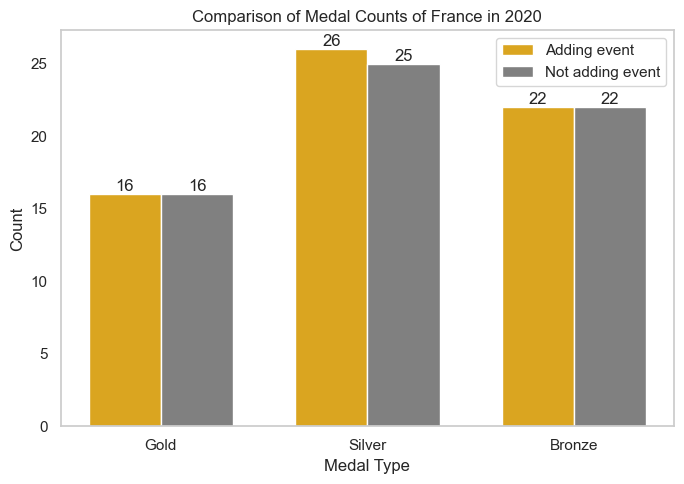

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu huy chương với môn A và không có môn A
categories = ['Gold', 'Silver', 'Bronze']
with_A = [16, 26 ,22]
without_A = [16, 25, 22]
# with_A = [27, 14, 17]
# without_A = [64, 37, 18]

x = np.arange(len(categories))  # Vị trí các cột
width = 0.35  # Độ rộng của mỗi cột

# Tạo plot
fig, ax = plt.subplots(figsize=(7, 5))
bars_with_A = ax.bar(x - width/2, with_A, width, label='Adding event', color='goldenrod')
bars_without_A = ax.bar(x + width/2, without_A, width, label='Not adding event', color='gray')

# Gắn nhãn và tiêu đề
ax.set_xlabel('Medal Type')
ax.set_ylabel('Count')
ax.set_title('Comparison of Medal Counts of France in 2020')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Thêm giá trị trên các cột
for bars in [bars_with_A, bars_without_A]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
                ha='center', va='bottom')

plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt

df = pd.read_csv('./data/fixed_olympic_ranking.csv')


encoder = LabelEncoder()
df['NOC_CODE'] = encoder.fit_transform(df['NOC_CODE'])


# Đảm bảo dataframe có cột 'ds' và 'y'
df['ds'] = pd.to_datetime(df['Year'], format='%Y')  # Chuyển đổi cột 'Year' thành cột 'ds'
df['y'] = df['Gold']  # Là cột bạn muốn dự đoán

# Initialize the Prophet model
model = Prophet(
    interval_width=0.95,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.15,
)

# Add special seasonality for the Olympic cycle
model.add_seasonality(
    name='4_yearly', 
    period=4*365.25,  # 4 years in days
    fourier_order=10
)

# Add regressors
regressors = df.drop(columns=['y', 'ds', 'Year', 'Rank', 'Gold', 'Silver', 'Bronze', 'Total']).columns
for regressor in regressors:
    model.add_regressor(regressor)

# Make future dataframe for Olympics 2028 for all countries
df_2024 = df[df['Year']==2024]
countries = df_2024['NOC_CODE'].unique()

future = pd.DataFrame({
    'ds': pd.to_datetime(['2028-01-01'] * len(countries)),
    'NOC_CODE': countries,
    'Host': 0,
})

# Add regressors into dataframe future
for regressor in regressors:
    if regressor not in ['NOC_CODE', 'Host']:
        future[regressor] = df_2024[regressor].values

# Set Host for USA in 2028
future.loc[future['NOC_CODE'] == encoder.transform(['USA'])[0], 'Host'] = 1

df = df.drop(columns=['Year'])

# Fit the model
model.fit(df)


# Predict
forecast = model.predict(future)
# Decode NOC_CODE back to original labels
forecast['NOC_CODE'] = encoder.inverse_transform(countries.astype(int))

# Làm tròn các giá trị dự đoán thành số nguyên
#forecast[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']].round().astype(int)

# Print forecast
prediction = forecast[['NOC_CODE', 'yhat', 'yhat_lower', 'yhat_upper']]
print(prediction)
#prediction.to_csv('./result_data/bronze_2028.csv', index=False)

# fig = model.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), model, forecast)
# # plt.savefig('./figures/forecast_plot_2028.png')
# plt.show()

#model.predictive_samples(future)


from scipy.interpolate import interp1d
# Chuyển đổi NOC_CODE thành số nguyên để nội suy

prediction.sort_values(by='yhat', ascending=False, inplace=True)
prediction = prediction[:20]
x = np.arange(len(prediction['NOC_CODE'])) + 1

# Tạo các hàm nội suy
f_yhat = interp1d(x, prediction['yhat'], kind='cubic')
f_yhat_upper = interp1d(x, prediction['yhat_upper'], kind='cubic')
f_yhat_lower = interp1d(x, prediction['yhat_lower'], kind='cubic')

# Tạo các điểm dữ liệu mượt mà hơn
x_new = np.linspace(1, len(prediction['NOC_CODE']), num=500)
yhat_smooth = f_yhat(x_new)
yhat_upper_smooth = f_yhat_upper(x_new)
yhat_lower_smooth = f_yhat_lower(x_new)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))

# Vẽ đường chính yhat
ax.plot(x_new, yhat_smooth, '-', color='b', alpha=0.4, label='Dự đoán')

# Vẽ các đường phụ yhat_upper và yhat_lower
ax.plot(x_new, yhat_upper_smooth, '-', color='b', alpha=0.15, label='Dự đoán cao nhất')
ax.plot(x_new, yhat_lower_smooth, '-', color='b', alpha=0.15, label='Dự đoán thấp nhất')

# Thêm phần diện tích giữa yhat_upper và yhat_lower
ax.fill_between(x_new, yhat_lower_smooth, yhat_upper_smooth, color='b', alpha=0.05)

# Thêm tiêu đề và nhãn
#title = r'$\bf{\textcolor{gold}{Gold}}$ Medals Prediction for Olympic 2028'
#ax.set_title(r'Gold Medals Prediction for Olympic 2028', fontsize=14, fontweight='bold')
title = r'$\bf{\textcolor{gold}{Gold}}$ Medals Prediction for Olympic 2028'
ax.set_title(title, fontsize=18)
#ax.title.set_text('Gold Medals Prediction for Olympic 2028', fontsize=14, color='gold')
ax.set_xlabel('Ranking', fontsize=12)
ax.set_ylabel('Number of medals', fontsize=12)
# Bỏ đi các số ở trục x
ax.set_xticks([0, 5, 10, 15])

# Hiển thị biểu đồ
plt.grid(False)
plt.show()